In [1]:

import sys
sys.path.append('../Scripts')
from PostProcessingScripts import * 


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd

def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])
colors = ['#1f77b4', '#ff7f0e']
colors_lighter = [adjust_lightness(color=colors[0], amount=2.2),adjust_lightness(color=colors[1], amount=1.7)]


# import random
import h5py as h5




In [ ]:
BPSmodelName = 'J'

DCOtype='BBH'
# path for files 
path_ = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
path  = path_ + 'COMPASCompactOutput_redshift'+ DCOtype +'_' + BPSmodelName + '.h5'

# read in data 
fdata = h5.File(path, 'r')

print(fdata.keys())

In [ ]:
# print(fdata['weights_detectedPerRedshift'].keys())
# 'R_000_z_0.0025'
print(fdata['weights_detectedPerRedshift']['R_000_z_0.0125'][...].squeeze())
# print(fdata['weights_detectedPerRedshift']['seed'][...].squeeze())

In [ ]:
minz = 0.
if DCOtype=='BHNS':
    maxz = .50
    resz = 100 # change to 100 //floor 
elif DCOtype=='BNS':
    maxz = .25
    resz = 100 # change to 100 //floor 
elif DCOtype=='BBH': 
    maxz = 2.5
    resz = 100 # change to 100 //floor 


temp_z = np.linspace(minz, maxz, resz+1)
redshiftshells = (temp_z[0:-1] + temp_z[1:])/2
del temp_z  

print(redshiftshells)


print()



redshiftEdges = np.linspace(minz,\
                            maxz,\
                            resz+1) #The bin edges in redshift
#Central value of each redshift bin, this is the value used in cosmic Int
Shell_dz             = np.diff(redshiftEdges)
Shell_centerRedshift = 0.5*(redshiftEdges[:-1] + redshiftEdges[1:])  
print(Shell_centerRedshift)

for zz in Shell_centerRedshift[0:3]:
    print(zz)
    print(round(zz, 4))
    
    

In [ ]:
minz = 0.
if DCOtype=='BHNS':
    maxz = .50
    resz = 100 # change to 100 //floor 
elif DCOtype=='BNS':
    maxz = .25
    resz = 100 # change to 100 //floor 
elif DCOtype=='BBH': 
    maxz = 2.5
    resz = 100 # change to 100 //floor 


temp_z = np.linspace(minz, maxz, resz+1)
redshiftshells = (temp_z[0:-1] + temp_z[1:])/2
del temp_z  

print(redshiftshells)


print()



redshiftEdges = np.linspace(minz,\
                            maxz,\
                            resz+1) #The bin edges in redshift
#Central value of each redshift bin, this is the value used in cosmic Int
Shell_dz             = np.diff(redshiftEdges)
Shell_centerRedshift = 0.5*(redshiftEdges[:-1] + redshiftEdges[1:])  
print(Shell_centerRedshift)

for zz in Shell_centerRedshift[0:3]:
    print(zz)
    print(round(zz, 4))

In [3]:
#Will only look at BBHs so might as well set everything

markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
dictMarkerShape = {BPSnameslist[i]: markershapes[i] for i in range(len(BPSnameslist))}





def redshift_rates(DCOtype='BBH', BPSlist=BPSnameslist, which='detected'):

    minz = 0.
    if DCOtype=='BHNS':
        maxz = .50
        resz = 100 # change to 100 //floor 
    elif DCOtype=='BNS':
        maxz = .25
        resz = 100 # change to 100 //floor 
    elif DCOtype=='BBH': 
        maxz = 2.5
        resz = 100 # change to 100 //floor 


    temp_z = np.linspace(minz, maxz, resz+1)
    redshiftshells = (temp_z[0:-1] + temp_z[1:])/2
    del temp_z  
    
    ###
    
    
    ms = 3
    
    ##
    d1, d2 = 16,10
    ncols, nrows=1,1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[1], "height_ratios":[1]})     
    
    
    for ind_BPS, BPSmodelName in enumerate(BPSlist):
        # path for files 
        path_ = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        # read in data 
        fdata = h5.File(path, 'r')
        
        if which=='detected':
            f_redshift = fdata['weights_detectedPerRedshift']
            text_legend = 'detectable population'
            ylabel = r'$\mathcal{R}_{\rm{BHBH}} $ ' +  r'$ \ \, [ \rm{yr}^{-1}]$'
        elif which=='intrinsic':
            f_redshift = fdata['weights_intrinsicPerRedshift']
            text_legend = 'astrophysical population'
            ylabel = r'$\mathcal{R}_{\rm{BHBH}} $ ' +  r'$ \ \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
            
        
#         for ind_mssfr, mssfr in enumerate([MSSFRnameslist[0]]):
        for ind_mssfr, mssfr in enumerate(MSSFRnameslist[:]):
            w_text = 'R_%s_z_'%mssfr
            rate_per_z = []
            
            color = 'gray'
            lw = 2
            
            
            ls_ = '-'
            Highlight = False
            if ((mssfr in ['123'])):# & (BPSmodelName in ['K'])):
                ls_ = ':'
                Highlight = True
                color = colorDirDict[BPSmodelName]
                lw = 4
            elif  ((mssfr in ['312'])):# & (BPSmodelName in ['T'])):
                ls_ = '--'
                Highlight = True
                color = colorDirDict[BPSmodelName]
                lw = 4
            elif ((mssfr in ['231'])):# & (BPSmodelName in ['O'])):
                ls_ = '-.'
                Highlight = True
                color = colorDirDict[BPSmodelName]
                lw = 4

            
            
            for ind_zz, zz in enumerate(redshiftshells):
                if mssfr=='000':
                    wname = w_text + '%s'%str(round(zz, 4))
                else:
                    wname = w_text + '%s'%str(round(zz, 3))
                weight = np.sum(f_redshift[wname])
                rate_per_z.append(weight)
            
            
            
            axe.plot(redshiftshells, rate_per_z, lw=lw, alpha=1, marker=dictMarkerShape[BPSmodelName], color=color, markersize=ms,markeredgecolor='k',mew=0.5,\
                    linestyle=ls_)
     
    
    
    axe.set_yscale('log')
    
    DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
    xlabel = r'\textbf{Redshift}'     
#     ylabel = r'$\rm{Source} \ \textbf{frame} \  \textbf{ %s} \ $'%DCOname_dict[DCOtype] + '\n' +  r'$\textbf{merger} \ \textbf{rate} \ \textbf{density} \ \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
    

    

    axe.set_xlim(0, 2.5)
#     axe.set_yscale('log')
    if which=='detected':
        axe.set_ylim(1E-2, 1E3)
        save_dir = 'detected_all'
        axe.text(s=text_legend, x=0.95, y=0.95, fontsize=24+4, ha='right', va='top', rotation=0, transform=axe.transAxes)
        axe.text(s='model %s'%BPSmodelName, x=0.95, y=0.85, fontsize=20, ha='right', va='top', rotation=0, transform=axe.transAxes)

    elif which=='intrinsic':
        save_dir = 'intrinsic_all'
        axe.set_ylim(1E0, 1E4)
        axe.text(s=text_legend, x=0.95, y=0.15, fontsize=24+4, ha='right', va='top', rotation=0, transform=axe.transAxes)
        axe.text(s='model %s'%BPSmodelName, x=0.95, y=0.05, fontsize=20, ha='right', va='top', rotation=0, transform=axe.transAxes)

    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=fs+6, setMinor=False, labelpad=4)

    
    
    
    plt.savefig('./' + save_dir + '/RedshiftRates_' +DCOtype + '_allLog_' +which + BPSmodelName + '.png', dpi=300, transparent=False)#,\
    plt.savefig('./' + save_dir + '/RedshiftRates_' +DCOtype + '_allLog_' +which + BPSmodelName + '.pdf')#,\    
#     plt.close()
    return 
 

In [ ]:
for BPS in BPSnameslist[:]:
    redshift_rates(DCOtype='BBH', BPSlist=[BPS], which='detected')
# 'R_000_z_0.0125'

In [ ]:
for BPS in BPSnameslist[1:]:
    redshift_rates(DCOtype='BHNS', BPSlist=BPS, which='intrinsic')
# 'R_000_z_0.0125'

In [ ]:
for BPS in BPSnameslist:
    redshift_rates(DCOtype='BBH', BPSlist=BPS, which='intrinsic')
# 'R_000_z_0.0125'

In [ ]:
DCOtype='BBH'
BPSmodelName ='D'



path_ = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

fdata = h5.File(path, 'r')


f_redshift = fdata['weights_intrinsicPerRedshift']


print(f_redshift.keys())

In [ ]:
print(f_redshift["SEED"][...].squeeze())

In [ ]:
A = np.asarray([])

B = 1

C.np.append(A, B)

print(C)

In [4]:





def plot_MRR_distribution(axe='None', xparam='chiEff', BPSmodelName='A', mode='pdf',\
                          spin_threshold='None', bw=0.01, xlim=[0,1], ylim=[0,1],\
                          plotYlog='False', ylim_threshold=0.02, which='detected'):#, mssfr='112'):
    
    fs_l = 28 # label fontsize
    
    colors = ['#1f77b4', '#ff7f0e']
    colors_lighter = [adjust_lightness(color=colors[0], amount=2.2),adjust_lightness(color=colors[1], amount=1.7)]

    DCOtype='BBH'   
    minz = 0.
    if DCOtype=='BHNS':
        maxz = .50
        resz = 100 # change to 100 //floor 
    elif DCOtype=='BNS':
        maxz = .25
        resz = 100 # change to 100 //floor 
    elif DCOtype=='BBH': 
        maxz = 10
        resz = 50 # change to 100 //floor 


    temp_z = np.linspace(minz, maxz, resz+1)
    redshiftshells = (temp_z[0:-1] + temp_z[1:])/2
    
    # path for files 
    path_ = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_redshift'+ DCOtype +'_' + BPSmodelName + '.h5'
    
    fdata = h5.File(path, 'r')
    massCO_ZAMSM1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
    massCO_ZAMSM2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
    # M1 will be the most massive, M2 the least massive compact object. 
    massCO_LVKM1, massCO_LVKM2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    MassRatioCO_LVK = massCO_LVKM2/massCO_LVKM1
    
    seedsDCO  = fdata['doubleCompactObjects']['seed'][...].squeeze()  # get the seeds in the DCO file 
    seedsSN   = fdata['supernovae']['randomSeed'][...].squeeze()    # get the seeds in the SN file 
    indices   = np.sort(np.unique(seedsSN[1::2], return_index=True)[1])
    maskSNdco = np.in1d(seedsSN,  seedsDCO) # mask in the SNe files the SNe that correspond to our DCO
    whichSN   = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]  # this is 1 if the initially primary star goes SN and 2 if the secondary goes supernova     
    whichSN2  = whichSN[1::2][indices]

    # either SN2 = primary (1) and M1 is > M2, or SN2 = secondary & M1 < M2 
    # this takes into account (first term) rejuvenation 
    mask_MRR = ((whichSN2==1) & (massCO_ZAMSM1>massCO_ZAMSM2) ) | ((whichSN2==2) & (massCO_ZAMSM1<massCO_ZAMSM2)) 

    del massCO_ZAMSM1
    del massCO_ZAMSM2
    del whichSN2
    del whichSN
    del maskSNdco
    del indices
    del seedsSN
    del seedsDCO
    
    


    
    if which=='detected':
        f_redshift = fdata['weights_detectedPerRedshift']

    elif which=='intrinsic':
        f_redshift = fdata['weights_intrinsicPerRedshift']


    if (mode in ['spin_PDF', 'spin_fraction', 'spinOne_fraction', 'spinTwo_fraction', 'm1spin_or_m2spin_fraction', 'spin_CDF' ]) | (xparam in ['chi_of_spinning_BH', 'chi_effective', 'log10_t_delay']):
        spin = COspin(data_path=path, state='he_depletion')  # set class 
        spin.setCOMPASData() # reads in the COMPAS DCO parameters 
        spinZAMSM1, spinZAMSM2  = spin.BaveraSpin() #ZAMS M1 SPIN 

        spinLVKM1, spinLVKM2 = np.zeros_like(spinZAMSM1), np.zeros_like(spinZAMSM1)
        spinLVKM1[mask_MRR] = spinZAMSM2[mask_MRR]  # MRR so M1 comes from M2ZAMS, we assign it spin from M2ZAMS
        spinLVKM1[~mask_MRR] = spinZAMSM1[~mask_MRR]  # no MRR so M1 comes from M1ZAMS, we assign it spin from M1ZAMS
        spinLVKM2[mask_MRR] = spinZAMSM1[mask_MRR]   # MRR so M2 comes from M1ZAMS, we assign it spin from M1ZAMS
        spinLVKM2[~mask_MRR] = spinZAMSM2[~mask_MRR]   # no MRR so M2 comes from M2ZAMS, we assign it spin from M2ZAMS     

        # spin_threshold = 0.05 # definition of "spinning BH"
        mask_LVKM1_spinning = (spinLVKM1 > spin_threshold ) 
        mask_LVKM2_spinning = (spinLVKM2 > spin_threshold ) # definition of "spinning BH"
        mask_anySpin = (spinLVKM1 > spin_threshold ) | (spinLVKM2 > spin_threshold )    
        print('anyspin mask = ', len(mask_anySpin), np.sum(mask_anySpin))
    

    
    if (mode=='MRR_PDF') | (mode=='spin_PDF'):
        nameY = r'\textbf{PDF}'
    elif (mode=='MRR_fraction'):
        nameY = r'$\rm{f}_{\rm{MRR}}$'
    elif (mode=='notMRR_fraction'):
        nameY = r'$\rm{f}_{\rm{non MRR}}$'
    elif (mode=='spin_fraction'):
        nameY =   r'$\rm{f}_{\chi_{1} > %s}$'%spin_threshold
    elif (mode=='m1spin_or_m2spin_fraction'):
        nameY =   r'$\rm{f}_{\chi_{\rm{i}} > %s}$'%spin_threshold 
    elif (mode=='MRR_CDF') | (mode=='spin_CDF'):
        nameY = r'\textbf{CDF}'
    elif (mode=='spinOne_fraction'):
        nameY =   r'$\rm{f}_{\chi_{1} > %s}$'%spin_threshold
    elif (mode=='spinTwo_fraction'):
        nameY =   r'$\rm{f}_{\chi_{2} > %s}$'%spin_threshold
    else:
        raise ValueError("the provided `mode` is not recognized, the value given is %s"%mode)
        
    param_x = redshiftshells
    xx = redshiftshells
    nameX = r'$\rm{redshift} \  z$'
    if plotYlog==True:       
        axe.set_yscale('log')
    
    for ind_mssfr, mssfr in enumerate(MSSFRnameslist[:2]):
#     for ind_mssfr, mssfr in enumerate(MSSFRnameslist[:]):
        w_text = 'R_%s_z_'%mssfr
        rate_per_z = np.asarray([])
        rate_per_z_MRR = np.asarray([])
        rate_per_z_nonMRR = np.asarray([])
        rate_per_z_oneSpin = np.asarray([])



        for ind_zz, zz in enumerate(redshiftshells):
#             if mssfr=='000':
            wname = w_text + '%s'%str(round(zz, 4))
#             else:
#                 wname = w_text + '%s'%str(round(zz, 3))
            weight = np.sum(f_redshift[wname][...].squeeze())
            weight_raw = f_redshift[wname][...].squeeze()
            rate_per_z = np.append(rate_per_z, np.sum(weight_raw))

            if (mode=='MRR_PDF') | (mode=='MRR_fraction') |  (mode=='notMRR_fraction') : 
#                 print(len(mask_MRR), mask_MRR)
#                 print( weight_raw)
#                 print(len(weight_raw), weight_raw)
                rate_per_z_MRR = np.append(rate_per_z_MRR,np.sum(weight_raw[mask_MRR]))
                rate_per_z_nonMRR= np.append(rate_per_z_nonMRR, np.sum(weight_raw[~mask_MRR]))
                , 
            elif mode in ['spin_PDF', 'spin_fraction', 'spinOne_fraction', 'spinTwo_fraction', 'm1spin_or_m2spin_fraction']:
                rate_per_z_nonMRR = np.append(rate_per_z_nonMRR, np.sum(weight_raw[mask_LVKM2_spinning]) )
                rate_per_z_MRR =np.append(rate_per_z_MRR, np.sum(weight_raw[mask_LVKM1_spinning]))
                rate_per_z_oneSpin = np.append(rate_per_z_oneSpin, np.sum(weight_raw[mask_anySpin]))
#                 print('weight_raw = ', len(weight_raw))
                



        ls_ = '-'
        Highlight = True
        if ((mssfr in ['123']) & (BPSmodelName in ['K'])):
            ls_ = ':'
            Highlight = True
        elif  ((mssfr in ['312']) & (BPSmodelName in ['T'])):
            ls_ = '--'
            Highlight = True
        elif ((mssfr in ['231']) & (BPSmodelName in ['O'])):
            ls_ = '-.'
            Highlight = True

            
            


        if (mode=='MRR_PDF') | (mode=='MRR_fraction') |  (mode=='notMRR_fraction') : 

            yy_nonMRR = rate_per_z_nonMRR / (rate_per_z)
            yy_MRR    = rate_per_z_MRR / (rate_per_z)

            
        
        elif mode in ['spin_PDF', 'spin_fraction', 'spinOne_fraction', 'spinTwo_fraction']:
            yy_nonMRR = rate_per_z_nonMRR / (rate_per_z_oneSpin)
            yy_MRR    = rate_per_z_MRR / (rate_per_z_oneSpin)


        # PLOTTING FRACTION     
        if mode in ['MRR_fraction', 'spin_fraction',  'notMRR_fraction', 'spinOne_fraction', 'spinTwo_fraction']: 
            
            yy_total = (yy_nonMRR + yy_MRR)
            # in some cases the overall PDF is so small, that the ratio is dominated by some shot noise. So we make those zero. 
            mask_too_small_values = (yy_nonMRR <ylim_threshold) & (yy_MRR < ylim_threshold)
            yy_MRR[mask_too_small_values] = np.zeros(int(np.sum(mask_too_small_values)))
            yy_nonMRR[mask_too_small_values] = np.zeros(int(np.sum(mask_too_small_values)))
            
            if (mode=='MRR_fraction') | (mode=='spin_fraction') | (mode=='spinOne_fraction'):
                ratio = yy_MRR/yy_total
#                 print(ratio)
                color = colors[1]
                color_lighter = colors_lighter[1]
            elif (mode=='notMRR_fraction') | (mode=='spinTwo_fraction'): 
                ratio = yy_nonMRR/yy_total
                color = colors[0]
                color_lighter = colors_lighter[0]
            
            if Highlight==True:
                axe.plot(xx, ratio,     color=color,          lw=3,  zorder=20, alpha=1, ls=ls_)
#                 print(ratio)
            else:
#                 print(xx)
#                 print(ratio)
                axe.plot(xx, ratio,     color=color_lighter,  lw=1.5, zorder=6, alpha=1, ls=ls_)
#                 print(ratio)
            # remove labels and ticks  on X axe
            if mode in ['notMRR_fraction',  'spinTwo_fraction']:
                axe = layoutAxesNoXlabel(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=5, fontsize=fs_l, labelSizeMajor=fs_major)
                for tick in axe.xaxis.get_major_ticks():
                    tick.tick1line.set_visible(False)
                    tick.tick2line.set_visible(False)
                    tick.label1.set_visible(False)
                    tick.label2.set_visible(False)
            else:
                axe = layoutAxes(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=5, fontsize=fs_l, labelSizeMajor=fs_major)
           
    
        elif (mode=='m1spin_or_m2spin_fraction'):
 
            yy_anySpin = rate_per_z_oneSpin / rate_per_z
            
            # in some cases the overall PDF is so small, that the ratio is dominated by some shot noise. So we make those zero. 
            mask_too_small_values = (yy_anySpin < ylim_threshold) & (rate_per_z < ylim_threshold)
            yy_anySpin[mask_too_small_values] = np.zeros(int(np.sum(mask_too_small_values)))            
            
#             print(yy_anySpin)
            if Highlight==True:
                axe.plot(xx, yy_anySpin,     color='k',        lw=2, zorder=20, alpha=1, ls=ls_)
            else:
                axe.plot(xx, yy_anySpin,     color='lightgray',      lw=2, zorder=6, alpha=1, ls=ls_)

                    
            # remove labels and ticks  on X axe
            axe = layoutAxesNoXlabel(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=5, fontsize=fs_l, labelSizeMajor=fs_major)
            for tick in axe.xaxis.get_major_ticks():
                tick.tick1line.set_visible(False)
                tick.tick2line.set_visible(False)
                tick.label1.set_visible(False)
                tick.label2.set_visible(False)

#     if mode in [ 'MRR_fraction', 'notMRR_fraction', 'spinTwo_fraction', 'spinOne_fraction', 'm1spin_or_m2spin_fraction']:
#         axe.set_yticks([0.25, 0.5, 1])
#     elif mode in ['MRR_CDF', 'spin_CDF']:
#         axe.set_yticks([0.5, 0.75, 1])
        

            
    axe.set_xlim(xlim[0], xlim[1])
    axe.set_ylim(ylim[0], ylim[1])
    axe.grid(True)
    
    


    
    return axe 









In [ ]:






# ### CHIRP MASS VS SPINS FRACTION ###

# fs_major=34
# fig, ax = plt.subplots(4,2, figsize=(24,11), gridspec_kw={"height_ratios":[1,1, 1, 2.5]})#,\
# #                            gridspec_kw={"width_ratios":[3, 3, 3, 3, 3]})



# which='intrinsic'

# # for ind_BPS, BPSmodel in enumerate(BPSnameslist[:]):
# for ind_BPS, BPSmodel in enumerate(['J']):
    
    
    
    
    
#     bw=0.85
# #     ylim_threshold = 0.00017
#     ylim_threshold = 0 #0.00025
#     spin_threshold=0.05
#     print('running model %s'%BPSmodel)
#     xparam = 'chirp_mass_LVK'
    
#     plotYlog = False
#     xlim, ylim = [0, 2.5], [0.0, 1.03]

#     ax[0,0] = plot_MRR_distribution(axe=ax[0,0], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 
#     ax[1,0] = plot_MRR_distribution(axe=ax[1,0], xparam=xparam, BPSmodelName=BPSmodel, mode='notMRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 
# #     ax[2,0] = plot_MRR_distribution(axe=ax[2,0], xparam=xparam, BPSmodelName=BPSmodel, mode='spinOne_fraction',\
# #                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 

#     plotYlog = True
# #     ylim = [0.00009, 0.03]
# #     ax[3,0] = plot_MRR_distribution(axe=ax[3,0], xparam=xparam, BPSmodelName=BPSmodel, mode='spin_PDF',\
# #                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)

 




# #     bw=0.0085
# #     ylim_threshold = 0.0018

# #     xparam = 'mass_ratio_LVK'
# #     plotYlog = False
# #     xlim, ylim = [0, 1], [0.0, 1.0]
# # #     xlim, ylim = [0, 40], [0.01, 1]
# #     ax[0,1] = plot_MRR_distribution(axe=ax[0,1], xparam=xparam, BPSmodelName=BPSmodel, mode='m1spin_or_m2spin_fraction',\
# #                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
# #     ax[1,1] = plot_MRR_distribution(axe=ax[1,1], xparam=xparam, BPSmodelName=BPSmodel, mode='spinTwo_fraction',\
# #                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)
# #     ax[2,1] = plot_MRR_distribution(axe=ax[2,1], xparam=xparam, BPSmodelName=BPSmodel, mode='spinOne_fraction',\
# #                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
# #     plotYlog = True
# #     ylim = [0.0009, 0.99]
# #     ax[3,1] = plot_MRR_distribution(axe=ax[3,1], xparam=xparam, BPSmodelName=BPSmodel, mode='spin_PDF',\
# #                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)

    




# xx = np.linspace(1000,20000,100)
# yy = np.linspace(1000,20000,100)
# lw=12
# fs = 28

# ax[3,0].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=116, alpha=1, label=r'$\chi_{1} > %s; \ $'%spin_threshold + r'\textbf{(MRR)}')#, ls=ls_)
# ax[3,0].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=115, alpha=1, label=r'$\chi_{2} > %s; \ $'%spin_threshold + r'\textbf{(non-MRR)}')#, ls=ls_)
# ax[3,0].legend(fontsize=fs-2, frameon=False, loc='upper right')






# plt.tight_layout()  
# plt.subplots_adjust(wspace=0.15, hspace=0.12)#2)


# plt.savefig('./redshift_MRR_split.pdf', transparent=False, bbox_inches="tight",  format='pdf')
# plt.savefig('./redshift_MRR_split.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
# # plt.savefig('./' + xparam   +  'fraction.eps', bbox_inches="tight", dpi=600, format='eps')
# plt.show()  







In [ ]:


#     ax[0,0] = plot_MRR_distribution(axe=ax[0,0], xparam=xparam, BPSmodelName=BPSmodel, mode='m1spin_or_m2spin_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 
#     ax[1,0] = plot_MRR_distribution(axe=ax[1,0], xparam=xparam, BPSmodelName=BPSmodel, mode='spinTwo_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 
#     ax[2,0] = plot_MRR_distribution(axe=ax[2,0], xparam=xparam, BPSmodelName=BPSmodel, mode='spinOne_fraction',\




### CHIRP MASS VS SPINS FRACTION ###

fs_major=34
fig, ax = plt.subplots(3,2, figsize=(18,11), gridspec_kw={"height_ratios":[1,1, 1]})#,\
#                            gridspec_kw={"width_ratios":[3, 3, 3, 3, 3]})


bw=0.85
ylim_threshold = 0.001 #0.00025
spin_threshold=0.2


# for ind_BPS, BPSmodel in enumerate(BPSnameslist[:]):
for ind_BPS, BPSmodel in enumerate(['A']):
    

    
    which='intrinsic'
    print('running model %s'%BPSmodel)
    xparam = 'chirp_mass_LVK'
    
    plotYlog = False
    xlim, ylim = [0, 10], [0.0, 1.1]
    print('one spin ')
    ax[0,0] = plot_MRR_distribution(axe=ax[0,0], xparam=xparam, BPSmodelName=BPSmodel, mode='m1spin_or_m2spin_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 
    
    xlim, ylim = [0, 10], [0.0, 1]
    print('spin 2')
    ax[1,0] = plot_MRR_distribution(axe=ax[1,0], xparam=xparam, BPSmodelName=BPSmodel, mode='spinTwo_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 
    print('spin 1')
    ax[2,0] = plot_MRR_distribution(axe=ax[2,0], xparam=xparam, BPSmodelName=BPSmodel, mode='spinOne_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 


    which='detected'

    print('running model %s'%BPSmodel)
    xparam = 'chirp_mass_LVK'
    
    plotYlog = False
    xlim, ylim = [0, 2.5], [0.0, 1]

#     ax[0,1] = plot_MRR_distribution(axe=ax[0,1], xparam=xparam, BPSmodelName=BPSmodel, mode='m1spin_or_m2spin_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 
#     xlim, ylim = [0, 2.5], [0.0, 1]
#     ax[1,1] = plot_MRR_distribution(axe=ax[1,1], xparam=xparam, BPSmodelName=BPSmodel, mode='spinTwo_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 
#     ax[2,1] = plot_MRR_distribution(axe=ax[2,1], xparam=xparam, BPSmodelName=BPSmodel, mode='spinOne_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 


    
    

xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 28

ax[0,1].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=116, alpha=1, label=r'$\chi_{1} > %s; \ $'%spin_threshold + r'\textbf{(MRR)}')#, ls=ls_)
ax[0,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=115, alpha=1, label=r'$\chi_{2} > %s; \ $'%spin_threshold + r'\textbf{(non-MRR)}')#, ls=ls_)
ax[0,1].legend(fontsize=fs-2, frameon=False, loc='upper right')






plt.tight_layout()  
plt.subplots_adjust(wspace=0.25, hspace=0.12)#2)


plt.savefig('./redshift_spin_split_' + str(spin_threshold) +  '.pdf', transparent=False, bbox_inches="tight",  format='pdf')
plt.savefig('./redshift_spin_split_' + str(spin_threshold) +  '.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
# plt.savefig('./' + xparam   +  'fraction.eps', bbox_inches="tight", dpi=600, format='eps')
plt.show()  







In [2]:


bw=0.85
ylim_threshold = 0.001 #0.00025
spin_threshold=0.2


BPSmodel = 'A'



which='intrinsic'
print('running model %s'%BPSmodel)
xparam = 'chirp_mass_LVK'
    
plotYlog = False
xlim, ylim = [0, 10], [0.0, 0.5]
xparam=xparam
BPSmodelName=BPSmodel
mode='m1spin_or_m2spin_fraction'
spin_threshold=0.05 





fs_l = 28 # label fontsize

colors = ['#1f77b4', '#ff7f0e']
colors_lighter = [adjust_lightness(color=colors[0], amount=2.2),adjust_lightness(color=colors[1], amount=1.7)]

DCOtype='BBH'   
minz = 0.
if DCOtype=='BHNS':
    maxz = .50
    resz = 100 # change to 100 //floor 
elif DCOtype=='BNS':
    maxz = .25
    resz = 100 # change to 100 //floor 
elif DCOtype=='BBH': 
    maxz = 10
    resz = 50 # change to 100 //floor 


temp_z = np.linspace(minz, maxz, resz+1)
redshiftshells = (temp_z[0:-1] + temp_z[1:])/2

# path for files 
path_ = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
path  = path_ + 'COMPASCompactOutput_redshift'+ DCOtype +'_' + BPSmodelName + '.h5'

fdata = h5.File(path, 'r')
massCO_ZAMSM1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
massCO_ZAMSM2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
# M1 will be the most massive, M2 the least massive compact object. 
massCO_LVKM1, massCO_LVKM2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
MassRatioCO_LVK = massCO_LVKM2/massCO_LVKM1

seedsDCO  = fdata['doubleCompactObjects']['seed'][...].squeeze()  # get the seeds in the DCO file 
seedsSN   = fdata['supernovae']['randomSeed'][...].squeeze()    # get the seeds in the SN file 
indices   = np.sort(np.unique(seedsSN[1::2], return_index=True)[1])
maskSNdco = np.in1d(seedsSN,  seedsDCO) # mask in the SNe files the SNe that correspond to our DCO
whichSN   = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]  # this is 1 if the initially primary star goes SN and 2 if the secondary goes supernova     
whichSN2  = whichSN[1::2][indices]

# either SN2 = primary (1) and M1 is > M2, or SN2 = secondary & M1 < M2 
# this takes into account (first term) rejuvenation 
mask_MRR = ((whichSN2==1) & (massCO_ZAMSM1>massCO_ZAMSM2) ) | ((whichSN2==2) & (massCO_ZAMSM1<massCO_ZAMSM2)) 

del massCO_ZAMSM1
del massCO_ZAMSM2
del whichSN2
del whichSN
del maskSNdco
del indices
del seedsSN
del seedsDCO
    
    



if which=='detected':
    f_redshift = fdata['weights_detectedPerRedshift']

elif which=='intrinsic':
    f_redshift = fdata['weights_intrinsicPerRedshift']


if (mode in ['spin_PDF', 'spin_fraction', 'spinOne_fraction', 'spinTwo_fraction', 'm1spin_or_m2spin_fraction', 'spin_CDF' ]) | (xparam in ['chi_of_spinning_BH', 'chi_effective', 'log10_t_delay']):
    spin = COspin(data_path=path, state='he_depletion')  # set class 
    spin.setCOMPASData() # reads in the COMPAS DCO parameters 
    spinZAMSM1, spinZAMSM2  = spin.BaveraSpin() #ZAMS M1 SPIN 

    spinLVKM1, spinLVKM2 = np.zeros_like(spinZAMSM1), np.zeros_like(spinZAMSM1)
    spinLVKM1[mask_MRR] = spinZAMSM2[mask_MRR]  # MRR so M1 comes from M2ZAMS, we assign it spin from M2ZAMS
    spinLVKM1[~mask_MRR] = spinZAMSM1[~mask_MRR]  # no MRR so M1 comes from M1ZAMS, we assign it spin from M1ZAMS
    spinLVKM2[mask_MRR] = spinZAMSM1[mask_MRR]   # MRR so M2 comes from M1ZAMS, we assign it spin from M1ZAMS
    spinLVKM2[~mask_MRR] = spinZAMSM2[~mask_MRR]   # no MRR so M2 comes from M2ZAMS, we assign it spin from M2ZAMS     

    # spin_threshold = 0.05 # definition of "spinning BH"
    mask_LVKM1_spinning = (spinLVKM1 > spin_threshold ) 
    mask_LVKM2_spinning = (spinLVKM2 > spin_threshold ) # definition of "spinning BH"
    mask_anySpin = (spinLVKM1 > spin_threshold ) | (spinLVKM2 > spin_threshold )    
    print('anyspin mask = ', len(mask_anySpin), np.sum(mask_anySpin))



if (mode=='MRR_PDF') | (mode=='spin_PDF'):
    nameY = r'\textbf{PDF}'
elif (mode=='MRR_fraction'):
    nameY = r'$\rm{f}_{\rm{MRR}}$'
elif (mode=='notMRR_fraction'):
    nameY = r'$\rm{f}_{\rm{non MRR}}$'
elif (mode=='spin_fraction'):
    nameY =   r'$\rm{f}_{\chi_{1} > %s}$'%spin_threshold
elif (mode=='m1spin_or_m2spin_fraction'):
    nameY =   r'$\rm{f}_{\chi_{\rm{i}} > %s}$'%spin_threshold 
elif (mode=='MRR_CDF') | (mode=='spin_CDF'):
    nameY = r'\textbf{CDF}'
elif (mode=='spinOne_fraction'):
    nameY =   r'$\rm{f}_{\chi_{1} > %s}$'%spin_threshold
elif (mode=='spinTwo_fraction'):
    nameY =   r'$\rm{f}_{\chi_{2} > %s}$'%spin_threshold
else:
    raise ValueError("the provided `mode` is not recognized, the value given is %s"%mode)

param_x = redshiftshells
xx = redshiftshells
nameX = r'$\rm{redshift} \  z$'
if plotYlog==True:       
    axe.set_yscale('log')

for ind_mssfr, mssfr in enumerate([MSSFRnameslist[0]]):
#     for ind_mssfr, mssfr in enumerate(MSSFRnameslist[:]):
    w_text = 'R_%s_z_'%mssfr
    rate_per_z = np.asarray([])
    rate_per_z_MRR = np.asarray([])
    rate_per_z_nonMRR = np.asarray([])
    rate_per_z_oneSpin = np.asarray([])



#     for ind_zz, zz in enumerate([redshiftshells[0:2]]):
# #             if mssfr=='000':
#         wname = w_text + '%s'%str(round(zz, 4))
# #             else:
# #                 wname = w_text + '%s'%str(round(zz, 3))

#         weight_raw = f_redshift[wname][...].squeeze()
    
    
    
#         axe.hist2d(x=x, y=y, density=True, weights=weight_raw, bins=[temp_z, np.linspace(0,1,20)], norm=mpl.colors.LogNorm(), cmap='viridis')
#         rate_per_z = np.append(rate_per_z, np.sum(weight_raw))

#         if (mode=='MRR_PDF') | (mode=='MRR_fraction') |  (mode=='notMRR_fraction') : 
# #                 print(len(mask_MRR), mask_MRR)
# #                 print( weight_raw)
# #                 print(len(weight_raw), weight_raw)
#             rate_per_z_MRR = np.append(rate_per_z_MRR,np.sum(weight_raw[mask_MRR]))
#             rate_per_z_nonMRR= np.append(rate_per_z_nonMRR, np.sum(weight_raw[~mask_MRR]))
#             , 
#         elif mode in ['spin_PDF', 'spin_fraction', 'spinOne_fraction', 'spinTwo_fraction', 'm1spin_or_m2spin_fraction']:
#             rate_per_z_nonMRR = np.append(rate_per_z_nonMRR, np.sum(weight_raw[mask_LVKM2_spinning]) )
#             rate_per_z_MRR =np.append(rate_per_z_MRR, np.sum(weight_raw[mask_LVKM1_spinning]))
#             rate_per_z_oneSpin = np.append(rate_per_z_oneSpin, np.sum(weight_raw[mask_anySpin]))
# #                 print('weight_raw = ', len(weight_raw))




#         ls_ = '-'
#         Highlight = False



#         if (mode=='m1spin_or_m2spin_fraction'):
 
#             yy_anySpin = rate_per_z_oneSpin / rate_per_z
            
#             # in some cases the overall PDF is so small, that the ratio is dominated by some shot noise. So we make those zero. 
#             mask_too_small_values = (yy_anySpin < ylim_threshold) & (rate_per_z < ylim_threshold)
#             yy_anySpin[mask_too_small_values] = np.zeros(int(np.sum(mask_too_small_values)))            
            
# #             print(yy_anySpin)
#             if Highlight==True:
#                 axe.plot(xx, yy_anySpin,     color='k',        lw=2, zorder=20, alpha=1, ls=ls_)
#             else:
#                 axe.plot(xx, yy_anySpin,     color='lightgray',      lw=2, zorder=6, alpha=1, ls=ls_)

                    
#             # remove labels and ticks  on X axe
#             axe = layoutAxesNoXlabel(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=5, fontsize=fs_l, labelSizeMajor=fs_major)
#             for tick in axe.xaxis.get_major_ticks():
#                 tick.tick1line.set_visible(False)
#                 tick.tick2line.set_visible(False)
#                 tick.label1.set_visible(False)
#                 tick.label2.set_visible(False)

# #     if mode in [ 'MRR_fraction', 'notMRR_fraction', 'spinTwo_fraction', 'spinOne_fraction', 'm1spin_or_m2spin_fraction']:
# #         axe.set_yticks([0.25, 0.5, 1])
# #     elif mode in ['MRR_CDF', 'spin_CDF']:
# #         axe.set_yticks([0.5, 0.75, 1])
        

            
#     axe.set_xlim(xlim[0], xlim[1])
#     axe.set_ylim(ylim[0], ylim[1])
#     axe.grid(True)
    
    












running model A
0  systems had negative spin because they are outside of the boundary conditions; we set these to 0 
anyspin mask =  8371398 5064810


TypeError: type numpy.ndarray doesn't define __round__ method

In [ ]:
print('redshift = ',zz)
print(len(weight_raw), weight_raw)

print(len(spinLVKM1), spinLVKM1) # MRRs 


0.1
0.30000000000000004
0.5
0.7000000000000001
0.9
1.1
1.3000000000000003
1.5
1.7000000000000002
1.9
2.1
2.3000000000000003
2.5
2.7
2.9000000000000004
3.1
3.3000000000000003
3.5
3.7
3.9000000000000004
4.1
4.300000000000001
4.5
4.700000000000001
4.9
5.1
5.300000000000001
5.5
5.700000000000001
5.9


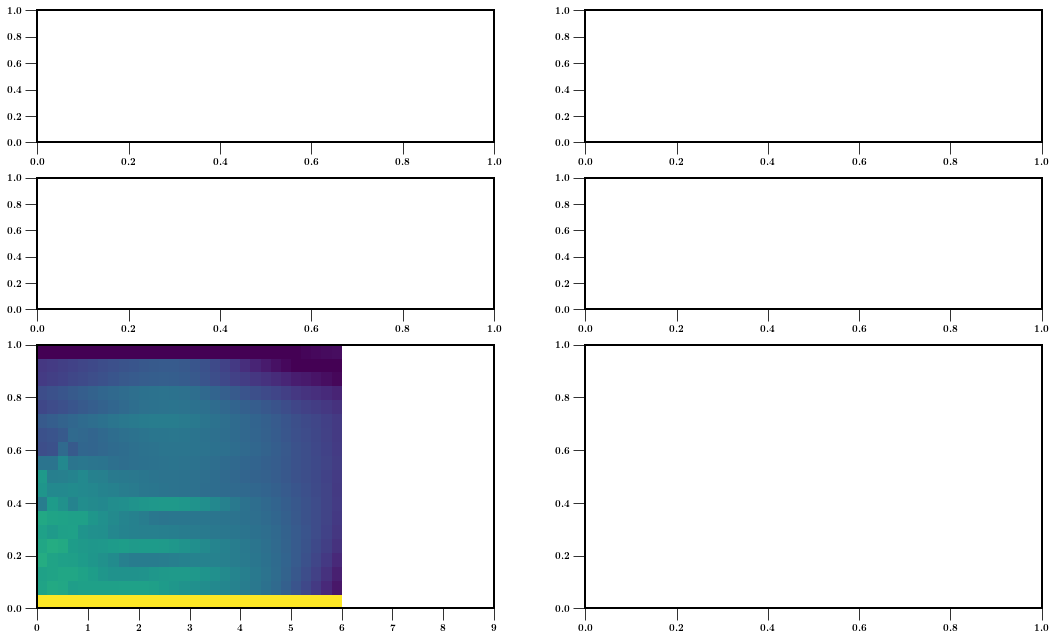

In [4]:
import matplotlib as mpl

fig, ax = plt.subplots(3,2, figsize=(18,11), gridspec_kw={"height_ratios":[1,1, 2]})#,\



# Creating dataset

axe = ax[2,0]
y = np.asarray(spinLVKM1)

for ind_zz, zz in enumerate(redshiftshells[0:30]):
    print(zz)
#             if mssfr=='000':
    wname = w_text + '%s'%str(round(zz, 4))
    #             else:
    #                 wname = w_text + '%s'%str(round(zz, 3))

    weight_raw = f_redshift[wname][...].squeeze()

    
    x = np.asarray(zz * np.ones_like(y)) 

    axe.hist2d(x=x, y=y, density=True, weights=weight_raw, bins=[temp_z, np.linspace(0,1,20)], norm=mpl.colors.LogNorm(), cmap='viridis')   


axe.set_xlim(0,9)

  
# show plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
  
# Creating dataset
n = 100
y = np.random.standard_normal(n)
x = 0 * x 
  
fig = plt.subplots(figsize =(10, 7))
# Creating plot
plt.hist2d(x, y)
plt.title("Simple 2D Histogram")
  
# show plot
plt.show()

In [ ]:






### CHIRP MASS VS SPINS FRACTION ###

fs_major=34
fig, ax = plt.subplots(4,2, figsize=(24,11), gridspec_kw={"height_ratios":[1,1, 1, 2.5]})#,\
#                            gridspec_kw={"width_ratios":[3, 3, 3, 3, 3]})



which='intrinsic'

# for ind_BPS, BPSmodel in enumerate(BPSnameslist[:]):
for ind_BPS, BPSmodel in enumerate([BPSnameslist[0]]):
    
    
    
    
    
    bw=0.85
#     ylim_threshold = 0.00017
    ylim_threshold = 0.00025
    spin_threshold=0.05
    print('running model %s'%BPSmodel)
    xparam = 'chirp_mass_LVK'
    
    plotYlog = False
    xlim, ylim = [0, 58], [0.0, 1.03]

    ax[0,0] = plot_MRR_distribution(axe=ax[0,0], xparam=xparam, BPSmodelName=BPSmodel, mode='m1spin_or_m2spin_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 
    ax[1,0] = plot_MRR_distribution(axe=ax[1,0], xparam=xparam, BPSmodelName=BPSmodel, mode='spinTwo_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 
    ax[2,0] = plot_MRR_distribution(axe=ax[2,0], xparam=xparam, BPSmodelName=BPSmodel, mode='spinOne_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold, which=which) 

    plotYlog = True
    ylim = [0.00009, 0.03]
    ax[3,0] = plot_MRR_distribution(axe=ax[3,0], xparam=xparam, BPSmodelName=BPSmodel, mode='spin_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)

 




    bw=0.0085
    ylim_threshold = 0.0018

    xparam = 'mass_ratio_LVK'
    plotYlog = False
    xlim, ylim = [0, 1], [0.0, 1.0]
#     xlim, ylim = [0, 40], [0.01, 1]
    ax[0,1] = plot_MRR_distribution(axe=ax[0,1], xparam=xparam, BPSmodelName=BPSmodel, mode='m1spin_or_m2spin_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    ax[1,1] = plot_MRR_distribution(axe=ax[1,1], xparam=xparam, BPSmodelName=BPSmodel, mode='spinTwo_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)
    ax[2,1] = plot_MRR_distribution(axe=ax[2,1], xparam=xparam, BPSmodelName=BPSmodel, mode='spinOne_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    plotYlog = True
    ylim = [0.0009, 0.99]
    ax[3,1] = plot_MRR_distribution(axe=ax[3,1], xparam=xparam, BPSmodelName=BPSmodel, mode='spin_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)

    




xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 28

ax[3,0].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=116, alpha=1, label=r'$\chi_{1} > %s; \ $'%spin_threshold + r'\textbf{(MRR)}')#, ls=ls_)
ax[3,0].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=115, alpha=1, label=r'$\chi_{2} > %s; \ $'%spin_threshold + r'\textbf{(non-MRR)}')#, ls=ls_)
ax[3,0].legend(fontsize=fs-2, frameon=False, loc='upper right')






plt.tight_layout()  
plt.subplots_adjust(wspace=0.15, hspace=0.12)#2)


plt.savefig('./super_spins_split_2.pdf', transparent=False, bbox_inches="tight",  format='pdf')
plt.savefig('./super_spins_split_2.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
# plt.savefig('./' + xparam   +  'fraction.eps', bbox_inches="tight", dpi=600, format='eps')
plt.show()  





